# Practical 4

Donnella le Roux

### Bathymetry

Use the GMRT Map Tool (https://www.gmrt.org/GMRTMapTool/) to locate, select and download an area of interest

To inspect the downloaded Bathymometric data, the following libraries will need to be installed and imported:

In [7]:
pip install xarray netCDF4 matplotlib cartopy cmocean

Note: you may need to restart the kernel to use updated packages.


In [66]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import cmocean.cm as cmo

Load and inspect the downloaded data:

In [97]:
bathymetry_file = "c:/users/lerou/OneDrive - University of Pretoria/UCT/MASTERS 25/SCDM/LRXDON007-SCDM2025/P4/TyrrhenianSea.grd"  # file path
ds_bathy = xr.open_dataset(bathymetry_file)
print(ds_bathy)
print(ds_bathy.attrs)

<xarray.Dataset> Size: 19MB
Dimensions:   (lon: 1823, lat: 1334)
Coordinates:
  * lon       (lon) float64 15kB 8.495 8.499 8.503 8.508 ... 16.5 16.5 16.51
  * lat       (lat) float64 11kB 37.5 37.5 37.5 37.51 ... 41.99 41.99 42.0 42.0
Data variables:
    altitude  (lat, lon) float64 19MB ...
Attributes:
    title:        GMRT Grid
    history:      Projection: Cylindrical Equidistant\nExtracted from the Glo...
    Conventions:  COARDS,CF-1.6
    GMT_version:  4.5.7
{'title': 'GMRT Grid', 'history': 'Projection: Cylindrical Equidistant\nExtracted from the Global Multi-Resolution Topgraphy (GMRT) Synthesis v2.7\nhttp://gmrt.marine-geo.org\nCreated with GMRT GridServer\nhttp://www.marine-geo.org/tools/gridserverinfo.php', 'Conventions': 'COARDS,CF-1.6', 'GMT_version': '4.5.7'}


Extract key variables:

In [112]:
lon = ds_bathy['lon']  # Longitude
lat = ds_bathy['lat']  # Latitude
depth = ds_bathy['altitude'].values  # Bathymetry (depth)

Looking at the structure of these variables:

In [99]:
print(f"Longitude shape: {lon.shape}")
print(f"Latitude shape: {lat.shape}")
print(f"Depth shape: {depth.shape}")

Longitude shape: (1823,)
Latitude shape: (1334,)
Depth shape: (1334, 1823)


Now that we have inspected the data and extracted key variables, we will begin plotting our map using cartopy.

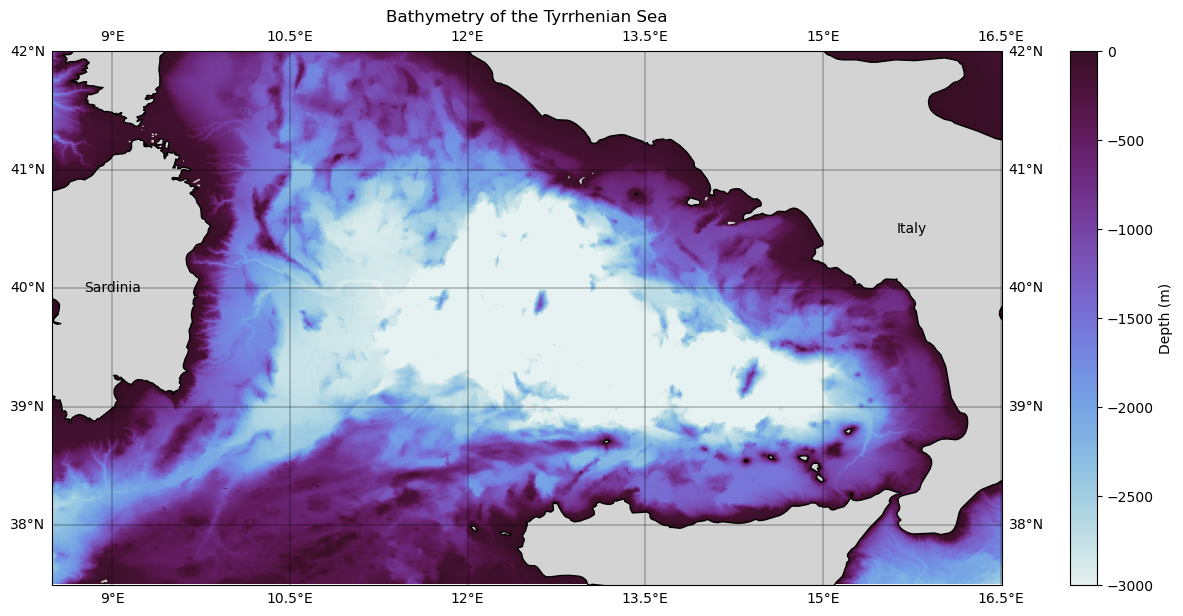

In [146]:
# create the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
im = ax.pcolormesh(lon, lat, depth, cmap="cmo.dense", vmin=-3000, vmax=0, shading='auto', transform=ccrs.PlateCarree()) 
plt.subplots_adjust(top=1, right=1.5)  # adjust margins

# add features
ax.coastlines(resolution='10m')  # add high-resolution coastlines
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=1)
ax.gridlines(draw_labels=True, color='black', linestyle='-', linewidth=0.3, zorder=2)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Depth (m)")

# add labels
ax.set_title("Bathymetry of the Tyrrhenian Sea")
ax.text(15.75, 40.5, 'Italy', transform=ccrs.PlateCarree(), fontsize=10, color='black', ha='center', va='center')
ax.text(9, 40, 'Sardinia', transform=ccrs.PlateCarree(), fontsize=10, color='black', ha='center', va='center')

# print the plot
plt.show()

### Chlorophyll

Additional imports:

In [154]:
from matplotlib.colors import LogNorm

First, we will need to download the satellite-derived chlorophyll concentration from ESA-CCI Ocean Colour climatology.

Load and inspect the downloaded dataset

In [177]:
chloro_file = "c:/users/lerou/OneDrive - University of Pretoria/UCT/MASTERS 25/SCDM/LRXDON007-SCDM2025/P4/chlorophyll.nc"  # file path
ds_chloro = xr.open_dataset(chloro_file)
ds_chlreg = ds_chloro.sel(lat=slice(42, 37.5), lon=slice(8.5, 16.5))
print(ds_chlreg['chlor_a'].shape)

(12, 108, 192)


In [172]:
print(ds_chlreg.lat.shape)
print(ds_chlreg.lon.shape)

(108,)
(192,)


Compute the mean

In [178]:
chl_mean = ds_chlreg['chlor_a'].mean(dim="time")
print(chl_mean.shape)

(108, 192)


Creating the mean annual chlorophyll plot

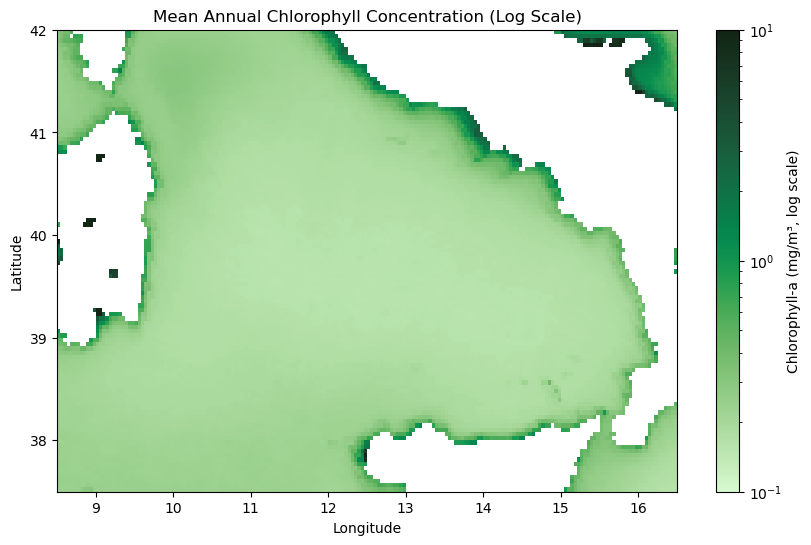

In [183]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
c = ax.pcolormesh(ds_chlreg['lon'], ds_chlreg['lat'], chl_mean, cmap=cmo.algae, norm=LogNorm(vmin=0.1, vmax=10))

# add features
cbar = fig.colorbar(c, ax=ax)
cbar.set_label("Chlorophyll-a (mg/m³, log scale)")

# add labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Mean Annual Chlorophyll Concentration (Log Scale)")

plt.show()

#### Monthly chlorophyll maps

Calculate the monthly chlorophyll

In [198]:
chl_monthly = ds_chlreg['chlor_a'].groupby("time.month").mean(dim='time')
print(ds_chlreg['time'].values[:12])

['1998-01-01T00:00:00.000000000' '1998-02-01T00:00:00.000000000'
 '1998-03-01T00:00:00.000000000' '1998-04-01T00:00:00.000000000'
 '1998-05-01T00:00:00.000000000' '1998-06-01T00:00:00.000000000'
 '1998-07-01T00:00:00.000000000' '1998-08-01T00:00:00.000000000'
 '1997-09-04T00:00:00.000000000' '1997-10-01T00:00:00.000000000'
 '1997-11-01T00:00:00.000000000' '1997-12-01T00:00:00.000000000']


Check the months

In [195]:
months = ds_chlreg['time'].dt.month
print(months[:12])
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

<xarray.DataArray 'month' (time: 12)> Size: 96B
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 96B 1998-01-01 1998-02-01 ... 1997-12-01
Attributes:
    standard_name:  time
    axis:           T


We want to visualise the mean chlorophyll-a concentration per month. To do this, we must create tweleve plots, each displaying the chlorophyll-a concentration for one month. We will do this by setting up a 4x3 suplot structure.

Create the subplots:

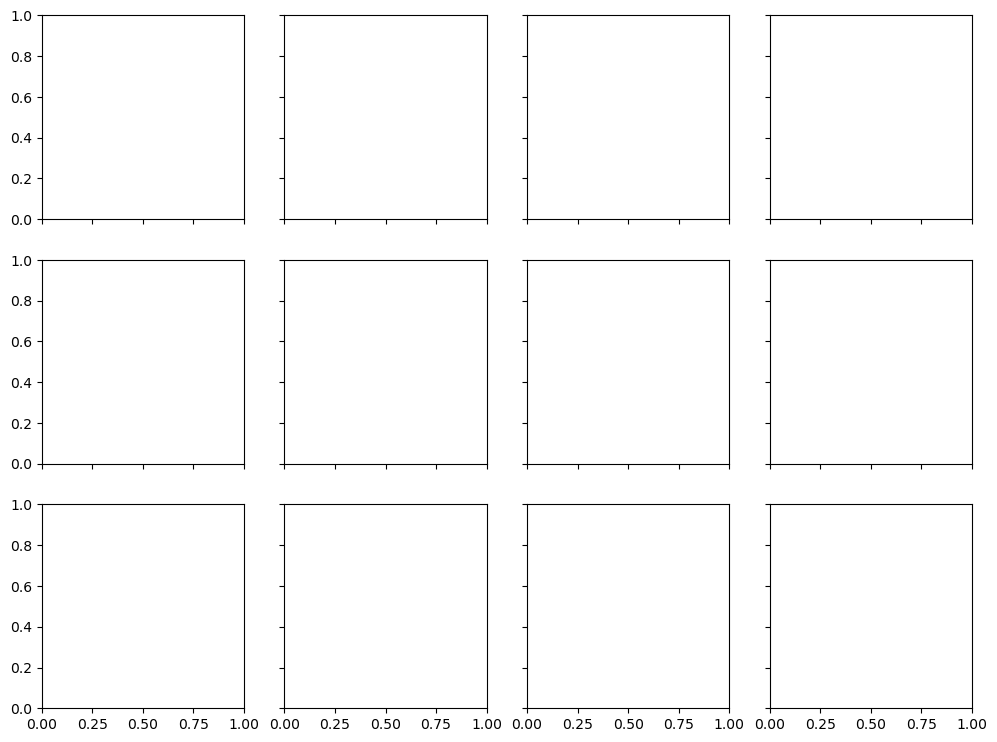

In [199]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), sharex=True, sharey=True)
axes = axes.flatten()
vmin, vmax = 0.01, 10 #setting a consistent colour scale

Populate the subplots 

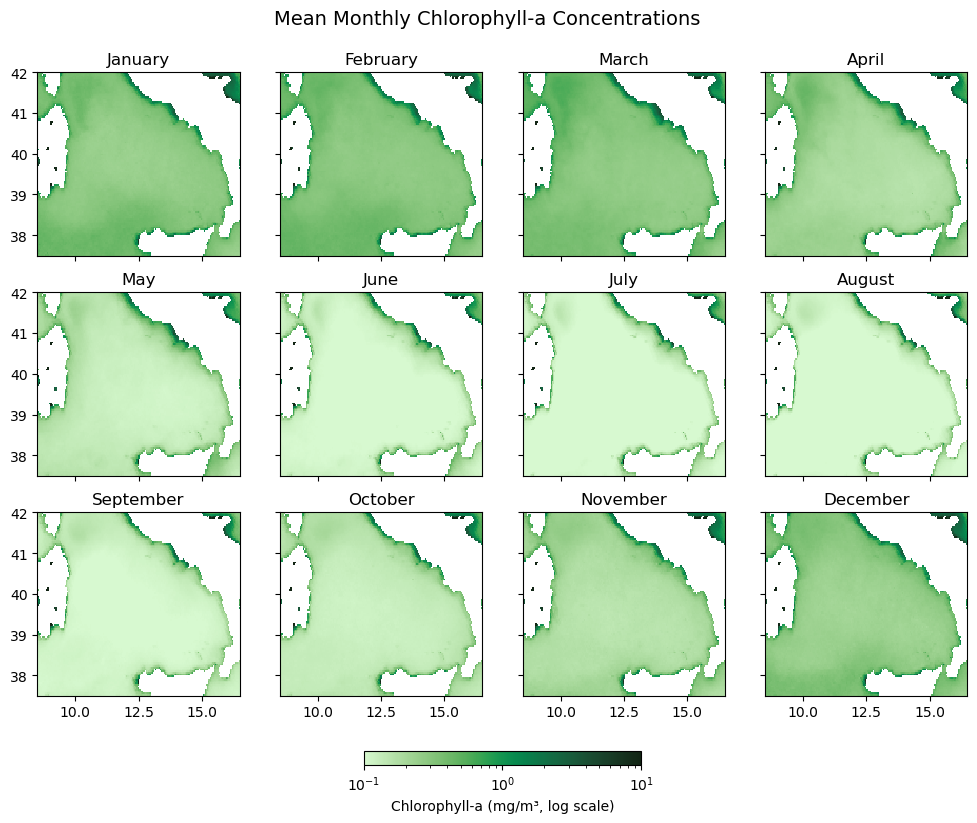

In [213]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), sharex=True, sharey=True)
axes = axes.flatten()

for month in range(1, 13):
    ax = axes[month - 1]
    chl_month = chl_monthly.sel(month=month)
    c = ax.pcolormesh(ds_chlreg['lon'], ds_chlreg['lat'], chl_month, cmap=cmo.algae, norm=LogNorm(vmin=0.1, vmax=10))
    # add month labels
    ax.set_title(month_names[month - 1])

fig.suptitle("Mean Monthly Chlorophyll-a Concentrations", fontsize=14, y=0.95)

# Shared colorbar
cbar_ax = fig.colorbar(c, ax=axes, orientation="horizontal", fraction=0.02, pad=0.08)
cbar_ax.set_label("Chlorophyll-a (mg/m³, log scale)")

plt.show()

#### Timeseries plot

Compute mean seasonal cycle over the whole region

In [227]:
chl_seasonal_mean = ds_chlreg['chlor_a'].groupby("time.month").mean(dim=["lat", "lon"])
print(chl_seasonal_mean)

<xarray.DataArray 'chlor_a' (time: 12)> Size: 48B
array([0.41536918, 0.4402085 , 0.42668745, 0.31404558, 0.22943665,
       0.18806875, 0.17684351, 0.1746428 , 0.19361727, 0.22210178,
       0.28403804, 0.37798947], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 96B 1998-01-01 1998-02-01 ... 1997-12-01
Attributes:
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    grid_mapping:         crs
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    units_nonstandard:    mg m^-3


Select a single gridpoint (with high chlorophyl-a concentration)

In [256]:
chl_grid_point = ds_chlreg['chlor_a'].sel(lat=40.75, lon=13.75, method="nearest").groupby("time.month").mean()
print("Selected grid point (41, 14):", chl_grid_point)

Selected grid point (41, 14): <xarray.DataArray 'chlor_a' (month: 12)> Size: 48B
array([0.36824122, 0.4269801 , 0.54512084, 0.39740717, 0.2761475 ,
       0.24018644, 0.17855458, 0.14457211, 0.17527936, 0.21322839,
       0.29554945, 0.34345123], dtype=float32)
Coordinates:
    lon      float64 8B 13.77
    lat      float64 8B 40.73
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    grid_mapping:         crs
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    units_nonstandard:    mg m^-3


Extract months from the time dimension

In [254]:
months = chl_seasonal_mean['time'].dt.month
print(months)

<xarray.DataArray 'month' (time: 12)> Size: 96B
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * time     (time) datetime64[ns] 96B 1998-01-01 1998-02-01 ... 1997-12-01
Attributes:
    standard_name:  time
    axis:           T


Plot the time series

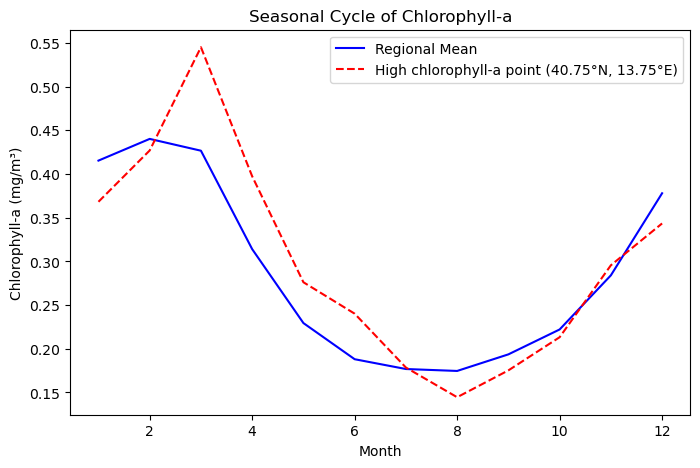

In [258]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(months, chl_seasonal_mean, label="Regional Mean", color="blue")
ax.plot(months, chl_grid_point, label="High chlorophyll-a point (40.75°N, 13.75°E)", color="red", linestyle="--")

# add labels
ax.set_xlabel("Month")
ax.set_ylabel("Chlorophyll-a (mg/m³)")
ax.set_title("Seasonal Cycle of Chlorophyll-a")
ax.legend()

plt.show()